# Diaptera wings classification using Topological Data Analysis

Guilherme Vituri F. Pinto [](https://orcid.org/0000-0002-7813-8777) (Unesp)  
Sergio UraNorthonApril 14, 2025

We studied etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc etc

In [1]:
using TDAfly, TDAfly.Preprocessing, TDAfly.TDA, TDAfly.Analysis
using Images: mosaicview
using Plots: plot, display, heatmap
using PersistenceDiagrams

## Introduction

Falar sobre o dataset, TDA, etc.

## Methods

We load all wings into images

In [2]:
paths = readdir("images/processed", join = true)
species = basename.(paths) .|> (x -> replace(x, ".png" => ""))
individuals = map(species) do specie
  s = split(specie, " ")
  s[1][1] * "-" * s[2]
end
wings = load_wing.(paths)
Xs = map(image_to_r2, wings);


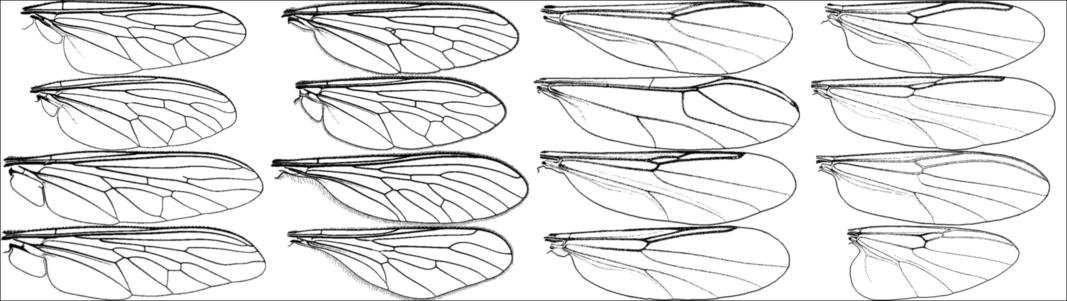

In [3]:
mosaicview(wings, ncol = 4, fillvalue=1)

### Vietoris-Rips filtration

We select 500 points from each image using a farthest point sample method

In [4]:
samples = map(Xs) do X
  ids = farthest_points_sample(X, 500)
  X[ids]
end;

Progress:   0%|▏                                        |  ETA: 0:00:50Progress: 100%|█████████████████████████████████████████| Time: 0:00:00

We then calculate its persistence diagrams using the Vietoris-Rips filtration etc.

In [5]:
# get only the 1-dimensional PD
rips = rips_pd.(samples, cutoff = 5, threshold = 200) .|> last;

We create the 1-dimensional persistence image for each persistence diagram using 10x10 matrices

In [6]:
PI = PersistenceImage(rips, size = (10, 10))

images_rips = PI.(rips);

### Examples

Below are some examples of 1-dimensional barcodes, its persistence image and the original wing that generated it. Note: we are plotting the barcode using the birth and persistence.

In [7]:
# plot some images to see the barcodes
map([1, 4, 8, 10, 15]) do i
  p = plot_wing_with_pd(rips[i], images_rips[i], samples[i], species[i])
  display(p)
end;

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip650)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip650)" d="M579.739 928.945 Q576.128 928.945 574.299 932.51 Q572.493 936.051 572.493 943.181 Q572.493 950.287 574.299 953.852 Q576.128 957.394 579.739 957.394 Q583.373 957.394 585.179 953.852 Q587.007 950.287 587.007 943.181 Q587.007 936.051 585.179 932.51 Q583.373 928.945 579.739 928.945 M579.739 925.241 Q585.549 925.241 588.604 929.848 Q591.683 934.431 591.683 943.181 Q591.683 951.908 588.604 956.514 Q585.549 961.097 579.739 961.097 Q573.929 961.097 570.85 956.514 Q567.794 951.908 567.794 943.181 Q567.794 934.431 570.85 929.848 Q573.929 925.241 579.739 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip650)" d="M644.13 956.491 L660.45 956.491 L660.45 960.426 L638.505 960.426 L638.505 956.491 Q641.167 953.736 645.751 949.107 Q650.357 944.454 651.538 943.111 Q653.783 940.588 654.663 938.852 Q655.566 937.093 655.566 935.403 Q655.566 932.649 653.621 930.912 Q651.7 929.176 648.598 929.176 Q646.399 929.176 643.945 929.94 Q641.515 930.704 638.737 932.255 L638.737 927.533 Q641.561 926.399 644.015 925.82 Q646.468 925.241 648.505 925.241 Q653.876 925.241 657.07 927.926 Q660.265 930.612 660.265 935.102 Q660.265 937.232 659.454 939.153 Q658.667 941.051 656.561 943.644 Q655.982 944.315 652.88 947.533 Q649.779 950.727 644.13 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip650)" d="M680.264 928.945 Q676.653 928.945 674.825 932.51 Q673.019 936.051 673.019 943.181 Q673.019 950.287 674.825 953.852 Q676.653 957.394 680.264 957.394 Q683.899 957.394 685.704 953.852 Q687.533 950.287 687.533 943.181 Q687.533 936.051 685.704 932.51 Q683.899 928.945 680.264 928.945 M680.264 925.241 Q686.075 925.241 689.13 929.848 Q692.209 934.431 692.209 943.181 Q692.209 951.908 689.13 956.514 Q686.075 961.097 680.264 961.097 Q674.454 961.097 671.376 956.514 Q668.32 951.908 668.32 943.181 Q668.32 934.431 671.376 929.848 Q674.454 925.241 680.264 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip650)" d="M753.857 941.792 Q757.214 942.51 759.089 944.778 Q760.987 947.047 760.987 950.38 Q760.987 955.496 757.469 958.297 Q753.95 961.097 747.469 961.097 Q745.293 961.097 742.978 960.658 Q740.686 960.241 738.233 959.384 L738.233 954.871 Q740.177 956.005 742.492 956.584 Q744.807 957.162 747.33 957.162 Q751.728 957.162 754.02 955.426 Q756.334 953.69 756.334 950.38 Q756.334 947.324 754.182 945.611 Q752.052 943.875 748.233 943.875 L744.205 943.875 L744.205 940.033 L748.418 940.033 Q751.867 940.033 753.695 938.667 Q755.524 937.278 755.524 934.686 Q755.524 932.024 753.626 930.612 Q751.751 929.176 748.233 929.176 Q746.311 929.176 744.112 929.593 Q741.913 930.01 739.274 930.889 L739.274 926.723 Q741.936 925.982 744.251 925.612 Q746.589 925.241 748.649 925.241 Q753.973 925.241 757.075 927.672 Q760.177 930.079 760.177 934.199 Q760.177 937.07 758.533 939.061 Q756.89 941.028 753.857 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip650)" d="M779.853 928.945 Q776.242 928.945 774.413 932.51 Q772.607 936.051 772.607 943.181 Q772.607 950.287 774.413 953.852 Q776.242 957.394 779.853 957.394 Q783.487 957.394 785.293 953.852 Q787.121 950.287 787.121 943.1

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip740)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip740)" d="M572.74 928.945 Q569.129 928.945 567.3 932.51 Q565.495 936.051 565.495 943.181 Q565.495 950.287 567.3 953.852 Q569.129 957.394 572.74 957.394 Q576.374 957.394 578.18 953.852 Q580.008 950.287 580.008 943.181 Q580.008 936.051 578.18 932.51 Q576.374 928.945 572.74 928.945 M572.74 925.241 Q578.55 925.241 581.606 929.848 Q584.684 934.431 584.684 943.181 Q584.684 951.908 581.606 956.514 Q578.55 961.097 572.74 961.097 Q566.93 961.097 563.851 956.514 Q560.795 951.908 560.795 943.181 Q560.795 934.431 563.851 929.848 Q566.93 925.241 572.74 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip740)" d="M630.133 956.491 L646.452 956.491 L646.452 960.426 L624.508 960.426 L624.508 956.491 Q627.17 953.736 631.753 949.107 Q636.359 944.454 637.54 943.111 Q639.785 940.588 640.665 938.852 Q641.568 937.093 641.568 935.403 Q641.568 932.649 639.623 930.912 Q637.702 929.176 634.6 929.176 Q632.401 929.176 629.947 929.94 Q627.517 930.704 624.739 932.255 L624.739 927.533 Q627.563 926.399 630.017 925.82 Q632.471 925.241 634.508 925.241 Q639.878 925.241 643.072 927.926 Q646.267 930.612 646.267 935.102 Q646.267 937.232 645.457 939.153 Q644.67 941.051 642.563 943.644 Q641.984 944.315 638.883 947.533 Q635.781 950.727 630.133 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip740)" d="M666.267 928.945 Q662.656 928.945 660.827 932.51 Q659.021 936.051 659.021 943.181 Q659.021 950.287 660.827 953.852 Q662.656 957.394 666.267 957.394 Q669.901 957.394 671.706 953.852 Q673.535 950.287 673.535 943.181 Q673.535 936.051 671.706 932.51 Q669.901 928.945 666.267 928.945 M666.267 925.241 Q672.077 925.241 675.132 929.848 Q678.211 934.431 678.211 943.181 Q678.211 951.908 675.132 956.514 Q672.077 961.097 666.267 961.097 Q660.456 961.097 657.378 956.514 Q654.322 951.908 654.322 943.181 Q654.322 934.431 657.378 929.848 Q660.456 925.241 666.267 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip740)" d="M732.861 941.792 Q736.217 942.51 738.092 944.778 Q739.99 947.047 739.99 950.38 Q739.99 955.496 736.472 958.297 Q732.953 961.097 726.472 961.097 Q724.296 961.097 721.981 960.658 Q719.69 960.241 717.236 959.384 L717.236 954.871 Q719.18 956.005 721.495 956.584 Q723.81 957.162 726.333 957.162 Q730.731 957.162 733.023 955.426 Q735.338 953.69 735.338 950.38 Q735.338 947.324 733.185 945.611 Q731.055 943.875 727.236 943.875 L723.208 943.875 L723.208 940.033 L727.421 940.033 Q730.87 940.033 732.699 938.667 Q734.527 937.278 734.527 934.686 Q734.527 932.024 732.629 930.612 Q730.754 929.176 727.236 929.176 Q725.314 929.176 723.115 929.593 Q720.916 930.01 718.277 930.889 L718.277 926.723 Q720.94 925.982 723.254 925.612 Q725.592 925.241 727.652 925.241 Q732.976 925.241 736.078 927.672 Q739.18 930.079 739.18 934.199 Q739.18 937.07 737.537 939.061 Q735.893 941.028 732.861 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip740)" d="M758.856 928.945 Q755.245 928.945 753.416 932.51 Q751.611 936.051 751.611 943.181 Q751.611 950.287 753.416 953.852 Q755.245 957.394 758.856 957.394 Q762.49 957.394 764.296 953.852 Q766.124 950.287 766.124 943.181 Q766.124 93

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip830)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip830)" d="M610.403 928.945 Q606.792 928.945 604.963 932.51 Q603.157 936.051 603.157 943.181 Q603.157 950.287 604.963 953.852 Q606.792 957.394 610.403 957.394 Q614.037 957.394 615.842 953.852 Q617.671 950.287 617.671 943.181 Q617.671 936.051 615.842 932.51 Q614.037 928.945 610.403 928.945 M610.403 925.241 Q616.213 925.241 619.268 929.848 Q622.347 934.431 622.347 943.181 Q622.347 951.908 619.268 956.514 Q616.213 961.097 610.403 961.097 Q604.592 961.097 601.514 956.514 Q598.458 951.908 598.458 943.181 Q598.458 934.431 601.514 929.848 Q604.592 925.241 610.403 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip830)" d="M705.458 956.491 L721.778 956.491 L721.778 960.426 L699.833 960.426 L699.833 956.491 Q702.495 953.736 707.079 949.107 Q711.685 944.454 712.866 943.111 Q715.111 940.588 715.991 938.852 Q716.893 937.093 716.893 935.403 Q716.893 932.649 714.949 930.912 Q713.028 929.176 709.926 929.176 Q707.727 929.176 705.273 929.94 Q702.842 930.704 700.065 932.255 L700.065 927.533 Q702.889 926.399 705.342 925.82 Q707.796 925.241 709.833 925.241 Q715.204 925.241 718.398 927.926 Q721.592 930.612 721.592 935.102 Q721.592 937.232 720.782 939.153 Q719.995 941.051 717.889 943.644 Q717.31 944.315 714.208 947.533 Q711.106 950.727 705.458 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip830)" d="M741.592 928.945 Q737.981 928.945 736.152 932.51 Q734.347 936.051 734.347 943.181 Q734.347 950.287 736.152 953.852 Q737.981 957.394 741.592 957.394 Q745.227 957.394 747.032 953.852 Q748.861 950.287 748.861 943.181 Q748.861 936.051 747.032 932.51 Q745.227 928.945 741.592 928.945 M741.592 925.241 Q747.402 925.241 750.458 929.848 Q753.537 934.431 753.537 943.181 Q753.537 951.908 750.458 956.514 Q747.402 961.097 741.592 961.097 Q735.782 961.097 732.703 956.514 Q729.648 951.908 729.648 943.181 Q729.648 934.431 732.703 929.848 Q735.782 925.241 741.592 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip830)" d="M845.849 941.792 Q849.206 942.51 851.081 944.778 Q852.979 947.047 852.979 950.38 Q852.979 955.496 849.46 958.297 Q845.942 961.097 839.46 961.097 Q837.284 961.097 834.97 960.658 Q832.678 960.241 830.224 959.384 L830.224 954.871 Q832.169 956.005 834.484 956.584 Q836.798 957.162 839.321 957.162 Q843.72 957.162 846.011 955.426 Q848.326 953.69 848.326 950.38 Q848.326 947.324 846.173 945.611 Q844.044 943.875 840.224 943.875 L836.196 943.875 L836.196 940.033 L840.409 940.033 Q843.858 940.033 845.687 938.667 Q847.516 937.278 847.516 934.686 Q847.516 932.024 845.618 930.612 Q843.743 929.176 840.224 929.176 Q838.303 929.176 836.104 929.593 Q833.905 930.01 831.266 930.889 L831.266 926.723 Q833.928 925.982 836.243 925.612 Q838.581 925.241 840.641 925.241 Q845.965 925.241 849.067 927.672 Q852.169 930.079 852.169 934.199 Q852.169 937.07 850.525 939.061 Q848.882 941.028 845.849 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip830)" d="M871.844 928.945 Q868.233 928.945 866.405 932.51 Q864.599 936.051 864.599 943.181 Q864.599 950.287 866.405 953.852 Q868.233 957.394 871.844 957.394 Q875.479 957.394 877.284 953.852 Q879.113 950.287 879.113 943

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip920)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip920)" d="M577.397 928.945 Q573.786 928.945 571.957 932.51 Q570.152 936.051 570.152 943.181 Q570.152 950.287 571.957 953.852 Q573.786 957.394 577.397 957.394 Q581.031 957.394 582.837 953.852 Q584.665 950.287 584.665 943.181 Q584.665 936.051 582.837 932.51 Q581.031 928.945 577.397 928.945 M577.397 925.241 Q583.207 925.241 586.263 929.848 Q589.341 934.431 589.341 943.181 Q589.341 951.908 586.263 956.514 Q583.207 961.097 577.397 961.097 Q571.587 961.097 568.508 956.514 Q565.452 951.908 565.452 943.181 Q565.452 934.431 568.508 929.848 Q571.587 925.241 577.397 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip920)" d="M639.447 956.491 L655.766 956.491 L655.766 960.426 L633.822 960.426 L633.822 956.491 Q636.484 953.736 641.067 949.107 Q645.673 944.454 646.854 943.111 Q649.099 940.588 649.979 938.852 Q650.882 937.093 650.882 935.403 Q650.882 932.649 648.937 930.912 Q647.016 929.176 643.914 929.176 Q641.715 929.176 639.261 929.94 Q636.831 930.704 634.053 932.255 L634.053 927.533 Q636.877 926.399 639.331 925.82 Q641.785 925.241 643.822 925.241 Q649.192 925.241 652.386 927.926 Q655.581 930.612 655.581 935.102 Q655.581 937.232 654.771 939.153 Q653.984 941.051 651.877 943.644 Q651.298 944.315 648.197 947.533 Q645.095 950.727 639.447 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip920)" d="M675.581 928.945 Q671.97 928.945 670.141 932.51 Q668.335 936.051 668.335 943.181 Q668.335 950.287 670.141 953.852 Q671.97 957.394 675.581 957.394 Q679.215 957.394 681.02 953.852 Q682.849 950.287 682.849 943.181 Q682.849 936.051 681.02 932.51 Q679.215 928.945 675.581 928.945 M675.581 925.241 Q681.391 925.241 684.446 929.848 Q687.525 934.431 687.525 943.181 Q687.525 951.908 684.446 956.514 Q681.391 961.097 675.581 961.097 Q669.771 961.097 666.692 956.514 Q663.636 951.908 663.636 943.181 Q663.636 934.431 666.692 929.848 Q669.771 925.241 675.581 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip920)" d="M746.832 941.792 Q750.188 942.51 752.063 944.778 Q753.961 947.047 753.961 950.38 Q753.961 955.496 750.443 958.297 Q746.924 961.097 740.443 961.097 Q738.267 961.097 735.952 960.658 Q733.661 960.241 731.207 959.384 L731.207 954.871 Q733.151 956.005 735.466 956.584 Q737.781 957.162 740.304 957.162 Q744.702 957.162 746.994 955.426 Q749.309 953.69 749.309 950.38 Q749.309 947.324 747.156 945.611 Q745.026 943.875 741.207 943.875 L737.179 943.875 L737.179 940.033 L741.392 940.033 Q744.841 940.033 746.67 938.667 Q748.498 937.278 748.498 934.686 Q748.498 932.024 746.6 930.612 Q744.725 929.176 741.207 929.176 Q739.286 929.176 737.086 929.593 Q734.887 930.01 732.249 930.889 L732.249 926.723 Q734.911 925.982 737.225 925.612 Q739.563 925.241 741.623 925.241 Q746.948 925.241 750.049 927.672 Q753.151 930.079 753.151 934.199 Q753.151 937.07 751.508 939.061 Q749.864 941.028 746.832 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip920)" d="M772.827 928.945 Q769.216 928.945 767.387 932.51 Q765.582 936.051 765.582 943.181 Q765.582 950.287 767.387 953.852 Q769.216 957.394 772.827 957.394 Q776.461 957.394 778.267 953.852 Q780.095 950.287 7

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip010)" d="M466.042 928.945 Q462.431 928.945 460.602 932.51 Q458.796 936.051 458.796 943.181 Q458.796 950.287 460.602 953.852 Q462.431 957.394 466.042 957.394 Q469.676 957.394 471.482 953.852 Q473.31 950.287 473.31 943.181 Q473.31 936.051 471.482 932.51 Q469.676 928.945 466.042 928.945 M466.042 925.241 Q471.852 925.241 474.907 929.848 Q477.986 934.431 477.986 943.181 Q477.986 951.908 474.907 956.514 Q471.852 961.097 466.042 961.097 Q460.232 961.097 457.153 956.514 Q454.097 951.908 454.097 943.181 Q454.097 934.431 457.153 929.848 Q460.232 925.241 466.042 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip010)" d="M573.891 928.945 Q570.28 928.945 568.451 932.51 Q566.646 936.051 566.646 943.181 Q566.646 950.287 568.451 953.852 Q570.28 957.394 573.891 957.394 Q577.525 957.394 579.331 953.852 Q581.159 950.287 581.159 943.181 Q581.159 936.051 579.331 932.51 Q577.525 928.945 573.891 928.945 M573.891 925.241 Q579.701 925.241 582.757 929.848 Q585.835 934.431 585.835 943.181 Q585.835 951.908 582.757 956.514 Q579.701 961.097 573.891 961.097 Q568.081 961.097 565.002 956.514 Q561.947 951.908 561.947 943.181 Q561.947 934.431 565.002 929.848 Q568.081 925.241 573.891 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip010)" d="M632.435 956.491 L648.754 956.491 L648.754 960.426 L626.81 960.426 L626.81 956.491 Q629.472 953.736 634.055 949.107 Q638.662 944.454 639.842 943.111 Q642.087 940.588 642.967 938.852 Q643.87 937.093 643.87 935.403 Q643.87 932.649 641.925 930.912 Q640.004 929.176 636.902 929.176 Q634.703 929.176 632.25 929.94 Q629.819 930.704 627.041 932.255 L627.041 927.533 Q629.865 926.399 632.319 925.82 Q634.773 925.241 636.81 925.241 Q642.18 925.241 645.375 927.926 Q648.569 930.612 648.569 935.102 Q648.569 937.232 647.759 939.153 Q646.972 941.051 644.865 943.644 Q644.287 944.315 641.185 947.533 Q638.083 950.727 632.435 956.491 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip010)" d="M668.569 928.945 Q664.958 928.945 663.129 932.51 Q661.323 936.051 661.323 943.181 Q661.323 950.287 663.129 953.852 Q664.958 957.394 668.569 957.394 Q672.203 957.394 674.009 953.852 Q675.837 950.287 675.837 943.181 Q675.837 936.051 674.009 932.51 Q672.203 928.945 668.569 928.945 M668.569 925.241 Q674.379 925.241 677.435 929.848 Q680.513 934.431 680.513 943.181 Q680.513 951.908 677.435 956.514 Q674.379 961.097 668.569 961.097 Q662.759 961.097 659.68 956.514 Q656.624 951.908 656.624 943.181 Q656.624 934.431 659.68 929.848 Q662.759 925.241 668.569 925.241 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip010)" d="M736.314 941.792 Q739.67 942.51 741.545 944.778 Q743.444 947.047 743.444 950.38 Q743.444 955.496 739.925 958.297 Q736.407 961.097 729.925 961.097 Q727.749 961.097 725.434 960.658 Q723.143 960.241 720.689 959.384 L720.689 954.871 Q722.634 956.005 724.948 956.584 Q727.263 957.162 729.786 957.162 Q734.184 957.162 736.476 955.426 Q738.791 953.69 738.791 950.38 Q738.791 947.324 736.638 945.611 Q734.508 943.875 730.689 943.875 L726.661 943.875 L726.661 940.033 L730.874 940.033 Q734.323 940.033 736.152 938.667 Q737.981 937.278 737.981 934.686 Q737.981 932.024 736.083 930.612 Q734.208 929.176 730.689 929.176 Q728.768 929.176 726.569 929.593 Q724.37 930.01 721.731 930.889 L721.731 926.723 Q724.393 925.982 726.708 925.612 Q729.046 925.241 731.106 925.241 Q736.43 925.241 739.532 927.672 Q742.633 930.079 742.633 934.199 Q742.633 937.07 740.99 939.061 Q739.346 941.028 736.314 941.792 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip010)" d="M762.309 928.945 Q758.698 928.945 756.869 932.51 Q755.064 936.051 755.064 943.181 Q755.064 950.287 756.869 953.852 Q758.698 957.394 762.309 957.394 Q765.943 957.394 767.749 953.852 Q769.578 950.287 769.578 94

We now calculate the Euclidean distance between each persistence image (seen as a vector of $\mathbb{R}^{10x10}$) and plot its heatmap

In [8]:
D = pairwise_distance(images_rips);

In [9]:
plot_heatmap(D, individuals, "Distance matrix for Vietoris-Rips barcodes")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip100)" d="M444.275 1846.85 Q447.631 1847.57 449.506 1849.84 Q451.404 1852.1 451.404 1855.44 Q451.404 1860.55 447.886 1863.35 Q444.367 1866.15 437.886 1866.15 Q435.71 1866.15 433.395 1865.71 Q431.103 1865.3 428.65 1864.44 L428.65 1859.93 Q430.594 1861.06 432.909 1861.64 Q435.224 1862.22 437.747 1862.22 Q442.145 1862.22 444.437 1860.48 Q446.751 1858.75 446.751 1855.44 Q446.751 1852.38 444.599 1850.67 Q442.469 1848.93 438.65 1848.93 L434.622 1848.93 L434.622 1845.09 L438.835 1845.09 Q442.284 1845.09 444.113 1843.72 Q445.941 1842.34 445.941 1839.74 Q445.941 1837.08 444.043 1835.67 Q442.168 1834.23 438.65 1834.23 Q436.728 1834.23 434.529 1834.65 Q432.33 1835.07 429.691 1835.95 L429.691 1831.78 Q432.353 1831.04 434.668 1830.67 Q437.006 1830.3 439.066 1830.3 Q444.39 1830.3 447.492 1832.73 Q450.594 1835.14 450.594 1839.26 Q450.594 1842.13 448.951 1844.12 Q447.307 1846.09 444.275 1846.85 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip100)" d="M702.137 1864.77 L702.137 1860.51 Q703.896 1861.34 705.701 1861.78 Q707.507 1862.22 709.243 1862.22 Q713.873 1862.22 716.303 1859.12 Q718.757 1855.99 719.104 1849.65 Q717.761 1851.64 715.701 1852.71 Q713.641 1853.77 711.141 1853.77 Q705.956 1853.77 702.924 1850.65 Q699.914 1847.5 699.914 1842.06 Q699.914 1836.73 703.062 1833.52 Q706.211 1830.3 711.442 1830.3 Q717.437 1830.3 720.585 1834.9 Q723.757 1839.49 723.757 1848.24 Q723.757 1856.41 719.868 1861.29 Q716.002 1866.15 709.451 1866.15 Q707.692 1866.15 705.886 1865.81 Q704.081 1865.46 702.137 1864.77 M711.442 1850.11 Q714.59 1850.11 716.419 1847.96 Q718.271 1845.81 718.271 1842.06 Q718.271 1838.33 716.419 1836.18 Q714.59 1834 711.442 1834 Q708.294 1834 706.442 1836.18 Q704.613 1838.33 704.613 1842.06 Q704.613 1845.81 706.442 1847.96 Q708.294 1850.11 711.442 1850.11 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip100)" d="M827.711 1861.55 L844.03 1861.55 L844.03 1865.48 L822.086 1865.48 L822.086 1861.55 Q824.748 1858.79 829.331 1854.16 Q833.938 1849.51 835.118 1848.17 Q837.364 1845.65 838.243 1843.91 Q839.146 1842.15 839.146 1840.46 Q839.146 1837.71 837.202 1835.97 Q835.28 1834.23 832.179 1834.23 Q829.98 1834.23 827.526 1835 Q825.095 1835.76 822.318 1837.31 L822.318 1832.59 Q825.142 1831.46 827.595 1830.88 Q830.049 1830.3 832.086 1830.3 Q837.456 1830.3 840.651 1832.98 Q843.845 1835.67 843.845 1840.16 Q843.845 1842.29 843.035 1844.21 Q842.248 1846.11 840.141 1848.7 Q839.563 1849.37 836.461 1852.59 Q833.359 1855.78 827.711 1861.55 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip100)" d="M973.436 1846.85 Q976.792 1847.57 978.667 1849.84 Q980.565 1852.1 980.565 1855.44 Q980.565 1860.55 977.047 1863.35 Q973.528 1866.15 967.047 1866.15 Q964.871 1866.15 962.556 1865.71 Q960.265 1865.3 957.811 1864.44 L957.811 1859.93 Q959.755 1861.06 962.07 1861.64 Q964.385 1862.22 966.908 1862.22 Q971.306 1862.22 973.598 1860.48 Q975.913 1858.75 975.913 1855.44 Q975.913 1852.38 973.76 1850.67 Q971.63 1848.93 967.811 1848.93 L963.783 1848.93 L963.783 1845.09 L967.996 1845.09 Q971.445 1845.09 973.274 1843.72 Q975.102 1842.34 975.102 1839.74 Q975.102 1837.08 973.204 1835.67 Q971.329 1834.23 967.811 1834.23 Q965.89 1834.23 963.691 1834.65 Q961.491 1835.07 958.853 1835.95 L958.853 1831.78 Q961.515 1831.04 963.829 1830.67 Q966.167 1830.3 968.228 1830.3 Q973.552 1830.3 976.653 1832.73 Q979.755 1835.14 979.755 1839.26 Q979.755 1842.13 978.112 1844.12 Q976.468 1846.09 973.436 1846.85 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip100)" d="M1095.55 1830.92 L1113.91 1830.92 L1113.91 1834.86 L1099.83 1834.86 L1099.83 1843.33 Q1100.85 1842.98 1101.87 1842.82 Q1102.89 1842.64 1103.91 1842.64 Q1109.69 1842.64 1113.07 1845.81 Q1116.45 1848.98 1116.

### Persistence Homology Transform

Now we will create several filtrations based on points and lines, etc.

In [10]:
A = wings[1] |> image_to_array;
f = dist_to_point(0, 0)
Af = modify_array(A, f)
heatmap(Af)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip190)" d="M655.242 1834 Q651.631 1834 649.802 1837.57 Q647.996 1841.11 647.996 1848.24 Q647.996 1855.34 649.802 1858.91 Q651.631 1862.45 655.242 1862.45 Q658.876 1862.45 660.681 1858.91 Q662.51 1855.34 662.51 1848.24 Q662.51 1841.11 660.681 1837.57 Q658.876 1834 655.242 1834 M655.242 1830.3 Q661.052 1830.3 664.107 1834.9 Q667.186 1839.49 667.186 1848.24 Q667.186 1856.96 664.107 1861.57 Q661.052 1866.15 655.242 1866.15 Q649.432 1866.15 646.353 1861.57 Q643.297 1856.96 643.297 1848.24 Q643.297 1839.49 646.353 1834.9 Q649.432 1830.3 655.242 1830.3 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip190)" d="M685.404 1834 Q681.792 1834 679.964 1837.57 Q678.158 1841.11 678.158 1848.24 Q678.158 1855.34 679.964 1858.91 Q681.792 1862.45 685.404 1862.45 Q689.038 1862.45 690.843 1858.91 Q692.672 1855.34 692.672 1848.24 Q692.672 1841.11 690.843 1837.57 Q689.038 1834 685.404 1834 M685.404 1830.3 Q691.214 1830.3 694.269 1834.9 Q697.348 1839.49 697.348 1848.24 Q697.348 1856.96 694.269 1861.57 Q691.214 1866.15 685.404 1866.15 Q679.593 1866.15 676.515 1861.57 Q673.459 1856.96 673.459 1848.24 Q673.459 1839.49 676.515 1834.9 Q679.593 1830.3 685.404 1830.3 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip190)" d="M1106.69 1861.55 L1123.01 1861.55 L1123.01 1865.48 L1101.07 1865.48 L1101.07 1861.55 Q1103.73 1858.79 1108.31 1854.16 Q1112.92 1849.51 1114.1 1848.17 Q1116.34 1845.65 1117.22 1843.91 Q1118.13 1842.15 1118.13 1840.46 Q1118.13 1837.71 1116.18 1835.97 Q1114.26 1834.23 1111.16 1834.23 Q1108.96 1834.23 1106.51 1835 Q1104.08 1835.76 1101.3 1837.31 L1101.3 1832.59 Q1104.12 1831.46 1106.58 1830.88 Q1109.03 1830.3 1111.07 1830.3 Q1116.44 1830.3 1119.63 1832.98 Q1122.83 1835.67 1122.83 1840.16 Q1122.83 1842.29 1122.02 1844.21 Q1121.23 1846.11 1119.12 1848.7 Q1118.54 1849.37 1115.44 1852.59 Q1112.34 1855.78 1106.69 1861.55 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip190)" d="M1142.83 1834 Q1139.21 1834 1137.39 1837.57 Q1135.58 1841.11 1135.58 1848.24 Q1135.58 1855.34 1137.39 1858.91 Q1139.21 1862.45 1142.83 1862.45 Q1146.46 1862.45 1148.27 1858.91 Q1150.09 1855.34 1150.09 1848.24 Q1150.09 1841.11 1148.27 1837.57 Q1146.46 1834 1142.83 1834 M1142.83 1830.3 Q1148.64 1830.3 1151.69 1834.9 Q1154.77 1839.49 1154.77 1848.24 Q1154.77 1856.96 1151.69 1861.57 Q1148.64 1866.15 1142.83 1866.15 Q1137.02 1866.15 1133.94 1861.57 Q1130.88 1856.96 1130.88 1848.24 Q1130.88 1839.49 1133.94 1834.9 Q1137.02 1830.3 1142.83 1830.3 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip190)" d="M1172.99 1834 Q1169.38 1834 1167.55 1837.57 Q1165.74 1841.11 1165.74 1848.24 Q1165.74 1855.34 1167.55 1858.91 Q1169.38 1862.45 1172.99 1862.45 Q1176.62 1862.45 1178.43 1858.91 Q1180.26 1855.34 1180.26 1848.24 Q1180.26 1841.11 1178.43 1837.57 Q1176.62 1834 1172.99 1834 M1172.99 1830.3 Q1178.8 1830.3 1181.85 1834.9 Q1184.93 1839.49 1184.93 1848.24 Q1184.93 1856.96 1181.85 1861.57 Q1178.8 1866.15 1172.99 1866.15 Q1167.18 1866.15 1164.1 1861.57 Q1161.04 1856.96 1161.04 1848.24 Q1161.04 1839.49 1164.1 1834.9 Q1167.18 1830.3 1172.99 1830.3 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip190)" d="M1603.48 1846.85 Q1606.83 1847.57 1608.71 1849.84 Q1610.61 1852.1 1610.61 1855.44 Q1610.61 1860.55 1607.09 1863.35 Q1603.57 1866.15 1597.09 1866.15 Q1594.91 1866.15 1592.6 1865.71 Q1590.31 1865.3 1587.85 1864.44 L1587.85 1859.93 Q1589.8 1861.06 1592.11 1861.64 Q1594.43 1862.22 1596.95 1862.22 Q1601.35 1862.22 1603.64 1860.48 Q1605.95 1858.75 1605.95 1855.44 Q1605.95 1852.38 1603.8 1850.67 Q1601.67 1848.93 1597.85 1848.93 L1593.82 1848.93 L1593.82 1845.09 L1598.04 1845.09 Q1601.49 1845.09 1603.31 1843.72 Q1605.14 1842.34 1605.14 1839.74 Q1605.14 1837.08 1603.24 1835.67 Q1601.37 1834.23 1597.85 1834.23 

In [11]:
point_pds = cubical_pd(Af, cutoff = 0.05)
plot_pd(point_pds)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path clip-path="url(#clip280)" d="M763.497 1767.34 Q759.886 1767.34 758.057 1770.9 Q756.252 1774.45 756.252 1781.58 Q756.252 1788.68 758.057 1792.25 Q759.886 1795.79 763.497 1795.79 Q767.131 1795.79 768.937 1792.25 Q770.765 1788.68 770.765 1781.58 Q770.765 1774.45 768.937 1770.9 Q767.131 1767.34 763.497 1767.34 M763.497 1763.64 Q769.307 1763.64 772.363 1768.24 Q775.441 1772.83 775.441 1781.58 Q775.441 1790.3 772.363 1794.91 Q769.307 1799.49 763.497 1799.49 Q757.687 1799.49 754.608 1794.91 Q751.553 1790.3 751.553 1781.58 Q751.553 1772.83 754.608 1768.24 Q757.687 1763.64 763.497 1763.64 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip280)" d="M793.659 1767.34 Q790.048 1767.34 788.219 1770.9 Q786.414 1774.45 786.414 1781.58 Q786.414 1788.68 788.219 1792.25 Q790.048 1795.79 793.659 1795.79 Q797.293 1795.79 799.099 1792.25 Q800.927 1788.68 800.927 1781.58 Q800.927 1774.45 799.099 1770.9 Q797.293 1767.34 793.659 1767.34 M793.659 1763.64 Q799.469 1763.64 802.525 1768.24 Q805.603 1772.83 805.603 1781.58 Q805.603 1790.3 802.525 1794.91 Q799.469 1799.49 793.659 1799.49 Q787.849 1799.49 784.77 1794.91 Q781.714 1790.3 781.714 1781.58 Q781.714 1772.83 784.77 1768.24 Q787.849 1763.64 793.659 1763.64 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip280)" d="M1083.84 1767.34 Q1080.23 1767.34 1078.4 1770.9 Q1076.59 1774.45 1076.59 1781.58 Q1076.59 1788.68 1078.4 1792.25 Q1080.23 1795.79 1083.84 1795.79 Q1087.47 1795.79 1089.28 1792.25 Q1091.11 1788.68 1091.11 1781.58 Q1091.11 1774.45 1089.28 1770.9 Q1087.47 1767.34 1083.84 1767.34 M1083.84 1763.64 Q1089.65 1763.64 1092.7 1768.24 Q1095.78 1772.83 1095.78 1781.58 Q1095.78 1790.3 1092.7 1794.91 Q1089.65 1799.49 1083.84 1799.49 Q1078.03 1799.49 1074.95 1794.91 Q1071.89 1790.3 1071.89 1781.58 Q1071.89 1772.83 1074.95 1768.24 Q1078.03 1763.64 1083.84 1763.64 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip280)" d="M1149.28 1764.26 L1167.63 1764.26 L1167.63 1768.2 L1153.56 1768.2 L1153.56 1776.67 Q1154.58 1776.32 1155.6 1776.16 Q1156.61 1775.97 1157.63 1775.97 Q1163.42 1775.97 1166.8 1779.15 Q1170.18 1782.32 1170.18 1787.73 Q1170.18 1793.31 1166.71 1796.41 Q1163.23 1799.49 1156.92 1799.49 Q1154.74 1799.49 1152.47 1799.12 Q1150.23 1798.75 1147.82 1798.01 L1147.82 1793.31 Q1149.9 1794.45 1152.12 1795 Q1154.35 1795.56 1156.82 1795.56 Q1160.83 1795.56 1163.17 1793.45 Q1165.5 1791.34 1165.5 1787.73 Q1165.5 1784.12 1163.17 1782.02 Q1160.83 1779.91 1156.82 1779.91 Q1154.95 1779.91 1153.07 1780.33 Q1151.22 1780.74 1149.28 1781.62 L1149.28 1764.26 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip280)" d="M1448.41 1767.34 Q1444.8 1767.34 1442.97 1770.9 Q1441.17 1774.45 1441.17 1781.58 Q1441.17 1788.68 1442.97 1792.25 Q1444.8 1795.79 1448.41 1795.79 Q1452.05 1795.79 1453.85 1792.25 Q1455.68 1788.68 1455.68 1781.58 Q1455.68 1774.45 1453.85 1770.9 Q1452.05 1767.34 1448.41 1767.34 M1448.41 1763.64 Q1454.22 1763.64 1457.28 1768.24 Q1460.36 1772.83 1460.36 1781.58 Q1460.36 1790.3 1457.28 1794.91 Q1454.22 1799.49 1448.41 1799.49 Q1442.6 1799.49 1439.52 1794.91 Q1436.47 1790.3 1436.47 1781.58 Q1436.47 1772.83 1439.52 1768.24 Q1442.6 1763.64 1448.41 1763.64 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip280)" d="M1483.69 1764.26 L1502.05 1764.26 L1502.05 1768.2 L1487.97 1768.2 L1487.97 1776.67 Q1488.99 1776.32 1490.01 1776.16 Q1491.03 1775.97 1492.05 1775.97 Q1497.83 1775.97 1501.21 1779.15 Q1504.59 1782.32 1504.59 1787.73 Q1504.59 1793.31 1501.12 1796.41 Q1497.65 1799.49 1491.33 1799.49 Q1489.15 1799.49 1486.89 1799.12 Q1484.64 1798.75 1482.23 1798.01 L1482.23 1793.31 Q1484.32 1794.45 1486.54 1795 Q1488.76 1795.56 1491.24 1795.56 Q1495.24 1795.56 1497.58 1793.45 Q1499.92 1791.34 1499.92 1787.73 Q1499.92 1784.12 1497.58 1782.02 Q1495.24 